<a href="https://colab.research.google.com/github/SteelworkerDB/CD_WEEK3/blob/main/Grafico_intereses_vs_grafico_principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRACTICA GRAFICO INTERESES VS GRAFICO PRINCIPAL

---



In [21]:
import pandas as pd
import matplotlib.pyplot as plt

#CARGA DE DATOS
filename='/content/mortgages.csv'
mort_df=pd.read_csv(filename)
mort_df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


<br> 1. Creen un filtro para que el nombre de la hipoteca sea de “30 años”.  Usen len() para encontrar cuántas filas corresponden a 30 años.

In [22]:
filtro_30y=mort_df['Mortgage Name']=='30 Year' #FILTRO
mort_filtrado=mort_df[filtro_30y] #APLICADO FILTRO
len(mort_filtrado.index) # CUENTA INDICES/FILAS

720

<br> 2. Creen un filtro para una tasa de interés del 3 % (observen cómo está escrito en los datos).  

In [23]:
filtro_3pc=mort_df['Interest Rate']==0.03


<br> 3. Definan el nuevo DataFrame basándose en los filtros de año e interés que han creado.

In [24]:
mort_filtrado_3pc=mort_filtrado[filtro_3pc]
mort_filtrado_3pc.head()

<ipython-input-24-858ff566b9ee>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mort_filtrado_3pc=mort_filtrado[filtro_3pc]


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


<br> 4. Tenemos una opción para el 5 % de tasa de interés:

In [25]:
filtro_5pc=mort_df['Interest Rate']==0.05
mort_filtrado_5pc=mort_filtrado[filtro_5pc]
mort_filtrado_5pc.head()

<ipython-input-25-9db14ca1207b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mort_filtrado_5pc=mort_filtrado[filtro_5pc]


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05
363,4,398552.10,2147.29,1660.63,486.66,398065.44,30 Year,0.05
364,5,398065.44,2147.29,1658.60,488.69,397576.75,30 Year,0.05


<br> 5. Suma Acumulada del Interés Pagado ¿Los tres primeros valores en la salida para la suma acumulativa de la tasa del 3 %?

In [30]:
mort_filtrado_3pc_ac=mort_filtrado_3pc.copy() #copia del dataframe filtrado 3%
#Se crea columna con el interes acumulado
mort_filtrado_3pc_ac['Int Paid Acumulada']= \
              mort_filtrado_3pc['Interest Paid'].cumsum()

mort_filtrado_3pc_ac.head(3) #En la columna Int Paid Acumulada se observan
                            #los tres primeros valores del interés acumulado

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate,Int Paid Acumulada
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03,1000.00
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03,1998.28
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03,2994.84


<br> 6. Trazar la línea negra (5 %).  

In [31]:
# Repito lo realizado para el dataframe filtrado 3%, con el dataframe filtrado 5%
mort_filtrado_5pc_ac=mort_filtrado_5pc.copy() #copia del dataframe filtrado 3%
#Se crea columna con el interes acumulado
mort_filtrado_5pc_ac['Int Paid Acumulada']= \
              mort_filtrado_5pc['Interest Paid'].cumsum()

mort_filtrado_5pc_ac.head(3) #En la columna Int Paid Acumulada se observan
                            #los tres primeros valores del interés acumulado


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate,Int Paid Acumulada
360,1,400000.00,2147.29,1666.66,480.63,399519.37,30 Year,0.05,1666.66
361,2,399519.37,2147.29,1664.66,482.63,399036.74,30 Year,0.05,3331.32
362,3,399036.74,2147.29,1662.65,484.64,398552.10,30 Year,0.05,4993.97


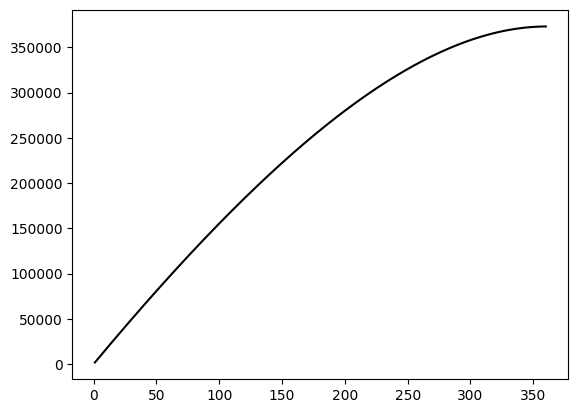

In [32]:
x=mort_filtrado_5pc_ac['Month']
y=mort_filtrado_5pc_ac['Int Paid Acumulada']
c='k'
plt.plot(x,y,c)

<br> 7. Ambas líneas en el mismo gráfico.

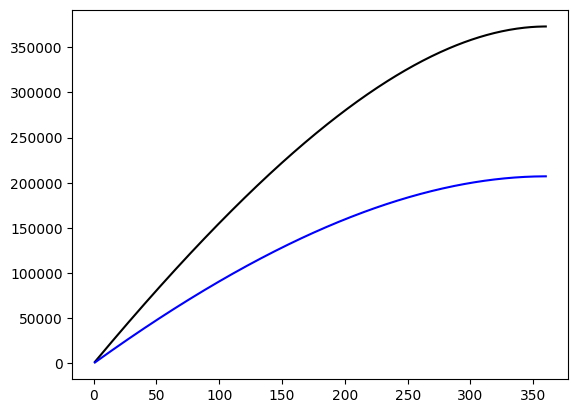

In [35]:
x=mort_filtrado_5pc_ac['Month']
y=mort_filtrado_5pc_ac['Int Paid Acumulada']
x2=mort_filtrado_3pc_ac['Month']
y2=mort_filtrado_3pc_ac['Int Paid Acumulada']
c='k'
c2='b'
plt.plot(x,y,c)
plt.plot(x2,y2,c2)
